retrieving "D:\projects\car-license-plate-recognition\doc\problem\placas\141002\Pa140028.jpg.pkz"


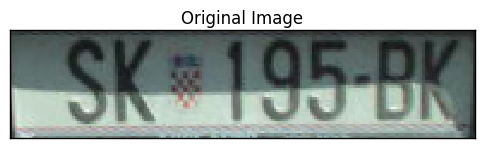

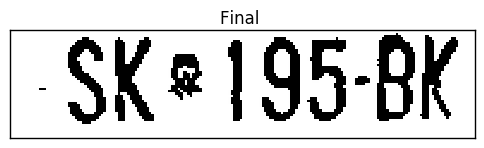

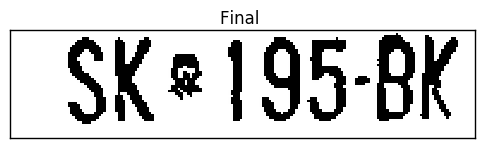

In [1]:
% matplotlib inline

import os
import cv2
import matplotlib.pyplot as plt
from plate import detect, segment, noise, roi, binarization, morph
import numpy as np
import iou

# img_path = "D:\\projects\\car-license-plate-recognition\\doc\\problem\\placas\\141002\\Pa140022.jpg"
# img_path = "D:\\projects\\car-license-plate-recognition\\doc\\problem\\placas\\141002\\Pa140015.jpg"
img_path = "D:\\projects\\car-license-plate-recognition\\doc\\problem\\placas\\141002\\Pa140028.jpg"
# img_path = "D:\\projects\\car-license-plate-recognition\\doc\\problem\\placas\\040603\\P6040022.jpg"
# img_path = "D:\\projects\\car-license-plate-recognition\\doc\\problem\\placas\\040603\\P6040033.jpg"
# img_path = "D:\\projects\\car-license-plate-recognition\\doc\\problem\\placas\\040603\\P6040041.jpg"
# img_path = "D:\\projects\\car-license-plate-recognition\\doc\\problem\\placas\\040603\\P6040043.jpg"
# img_path = "D:\\projects\\car-license-plate-recognition\\doc\\problem\\placas\\040603\\P6040068.jpg"
# img_path = "D:\\projects\\car-license-plate-recognition\\doc\\problem\\placas\\040603\\P1010004.jpg"
# img_path = "D:\\projects\\car-license-plate-recognition\\doc\\problem\\placas\\040603\\P6040015.jpg"
# img_path = "D:\\projects\\car-license-plate-recognition\\doc\\problem\\placas\\141002\\Pa140040.jpg" 
# img_path = "D:\\projects\\car-license-plate-recognition\\doc\\problem\\placas\\180902\\P9180045.jpg"
# img_path = "D:\\projects\\car-license-plate-recognition\\doc\\problem\\placas\\180902\\P9190058.jpg"
# img_path = "D:\\projects\\car-license-plate-recognition\\doc\\problem\\placas\\180902\\P9190066.jpg"
# img_path = "D:\\projects\\car-license-plate-recognition\\doc\\problem\\placas\\210503\\P1010030.jpg"
# img_path = "D:\\projects\\car-license-plate-recognition\\doc\\problem\\placas\\210503\\P1010006.jpg" 

img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# plate points retrieving
points = []
points_path = img_path + '.pkz'
if os.path.exists(points_path):
    points = roi.retrieve(points_path, decompress=False)
else:
    print(img_path, ' points file for plate not found')
    exit(1)

# plate segmentation
plates = segment.segment_plates(img, [points])
gray = cv2.cvtColor(plates[0], cv2.COLOR_RGB2GRAY)
h, w = gray.shape

# bilateral filter
wsize = h>>3
gray = cv2.bilateralFilter(gray, wsize, 30, wsize)

# noise filtering
filtered = noise.homomorphic(gray, 0.1, 1.)

plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.imshow(plates[0], interpolation='none')
plt.show()

# binarization
_, img_bin = cv2.threshold(filtered, 0, 255, cv2.THRESH_OTSU)
# img_bin = cv2.dilate(img_bin, cv2.getStructuringElement(cv2.MORPH_ERODE, (2, 2)), iterations=1)

# clean contours & dilate
contours, selected = morph.clean_contours(img_bin)
mask = segment.draw_segmentation_mask(w, h, contours, selected)
# mask = cv2.dilate(mask, cv2.getStructuringElement(cv2.MORPH_ERODE, (2, 2)), iterations=1)

# contours #2 & segment
final = segment.process_mask(filtered, mask)

plt.title('Final '), plt.xticks([]), plt.yticks([])
plt.imshow(final, cmap='gray', interpolation='none')
plt.show()

# contours final
final2 = morph.clean_img_bin(final, 20, h*w*0.5)
# final2 = cv2.blur(final2, (2, 2), borderType=cv2.BORDER_REPLICATE)
# final2 = cv2.resize(final2, (w>>1, h>>1))
# min_area = 20
# max_area = h*w*0.5
# final[0,:] = 255  
# final[h-1,:] = 255
# final[:,0] = 255
# final[:,w-1] = 255
# _, character_contours, _ = cv2.findContours(final, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_SIMPLE)
# mask = np.zeros((h, w), np.uint8)
# for i, character_cnt in enumerate(character_contours):
#     contour_area = cv2.contourArea(character_cnt)
#     print(contour_area)
#     if min_area < contour_area < max_area:
#         cv2.drawContours(mask, character_contours, i, (255, 255, 255), cv2.FILLED, 8)
# final2 = cv2.bitwise_and(final, final, mask=mask)
# bk = cv2.bitwise_not(np.zeros((h, w), np.uint8))
# final2_bk = cv2.bitwise_and(bk, bk, mask=cv2.bitwise_not(mask))
# final2 = cv2.bitwise_or(final2, final2_bk)

plt.title('Final '), plt.xticks([]), plt.yticks([])
plt.imshow(final2, cmap='gray', interpolation='none')
plt.show()